In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Загрузим уже обработанные в прошлом ДЗ данные!

In [2]:
df = pd.read_csv('processed_sigma.csv')
df = df.drop("Trip_ID", axis=1)

X = df.drop("Surge_Pricing_Type", axis=1)
y = df["Surge_Pricing_Type"]

### Principal component analysis (PCA)

**Задание 1.** Спроецируйте данные на двумерную плоскость, используя `PCA`. Другими словами, выделите первые две главные компоненты и изобразите данные в осях этих компонент. Не забудьте центрировать признаки перед применением метода. 

**Какую долю изначальной дисперсии (информации) содержат/объясняют в себе обе компоненты?** Для этого воспользуйтесь атрибутом `explained_variance_ratio_` у PCA-класса.

In [5]:
### Центрируем данные

### Your code is here

X_centered = X - X.mean()
X_centered.sum()

Trip_Distance                    3.107061e-10
Customer_Since_Months           -9.780621e-12
Life_Style_Index                -7.218226e-11
Customer_Rating                  1.475797e-11
Cancellation_Last_1Month         1.279066e-11
Var1                             1.982130e-10
Var2                            -3.268212e-10
Var3                             6.160690e-10
Type_of_Cab_B                    4.130030e-13
Type_of_Cab_C                    6.195044e-13
Type_of_Cab_D                   -1.147527e-12
Type_of_Cab_E                    4.254375e-13
Confidence_Life_Style_Index_B   -4.088285e-12
Confidence_Life_Style_Index_C   -8.597567e-13
Destination_Type_B              -1.025846e-12
Destination_Type_C              -3.014478e-12
Destination_Type_D              -2.078338e-13
Destination_Type_E               1.273648e-12
Destination_Type_F               3.705924e-13
Destination_Type_G              -6.710188e-13
Destination_Type_H              -5.373479e-14
Destination_Type_I              -1

In [6]:
from sklearn.decomposition import PCA

### Your code is here
pca = PCA(n_components=2)
PCA_dataset = pca.fit_transform(X_centered)
PCA_dataset = pd.DataFrame(PCA_dataset, columns=['PCA_1', 'PCA_2'])
PCA_dataset = np.concatenate((PCA_dataset.values, y.values.reshape(-1, 1)), axis=1)
PCA_dataset = pd.DataFrame(PCA_dataset, columns=['PCA1', 'PCA2', 'Surge_Pricing_Type'])
PCA_dataset

,PCA1,PCA2,Surge_Pricing_Type
0,-38.743132,-23.282634,2.0
1,-13.209252,-25.023815,2.0
2,-2.004910,-1.637085,2.0
3,17.178458,-0.907657,3.0
4,14.477389,-11.656752,2.0
...,...,...,...
131657,-32.267779,-2.482906,3.0
131658,32.621206,-0.886322,2.0
131659,-4.045367,-1.565545,2.0
131660,3.696395,-15.487904,2.0


In [7]:
variance_ratio = pca.explained_variance_ratio_
print("Доля дисперсии для каждой компоненты:", variance_ratio)
print("Тип объекта:", type(variance_ratio))

Доля дисперсии для каждой компоненты: [0.63176117 0.21129863]
Тип объекта: <class 'numpy.ndarray'>


<Axes: xlabel='PCA1', ylabel='PCA2'>

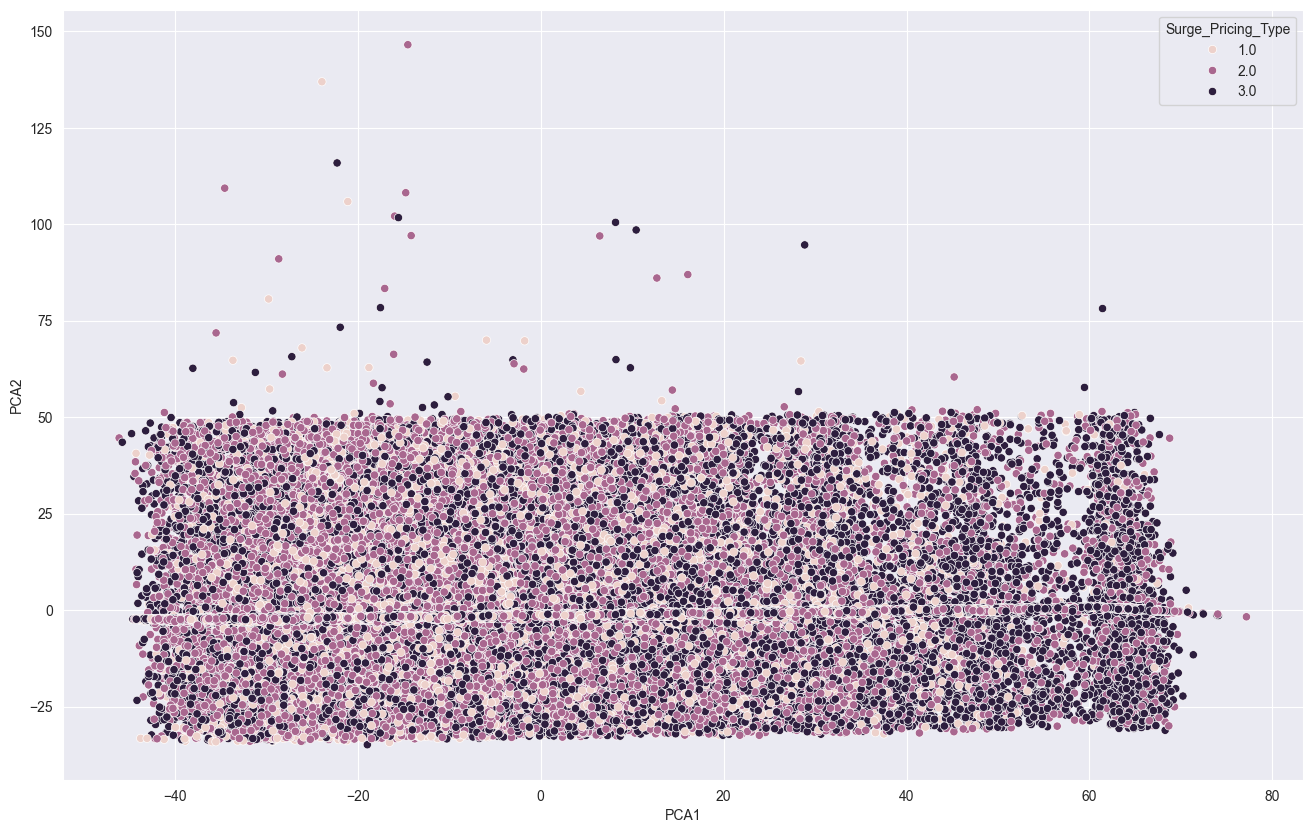

In [8]:
fig = plt.figure()
fig.set_size_inches(16, 10)

sns.scatterplot(data=PCA_dataset, x="PCA1", y="PCA2", hue="Surge_Pricing_Type")

**Задание 2.** Изобразите heatmap корреляции изначальных признаков с новыми двумя главными компонентами. \
**Какие признаки коррелируют с первой компонентой? Какие со второй? В качестве порогового значения договоримся о корреляции >= 0.5 по абсолютному значению **


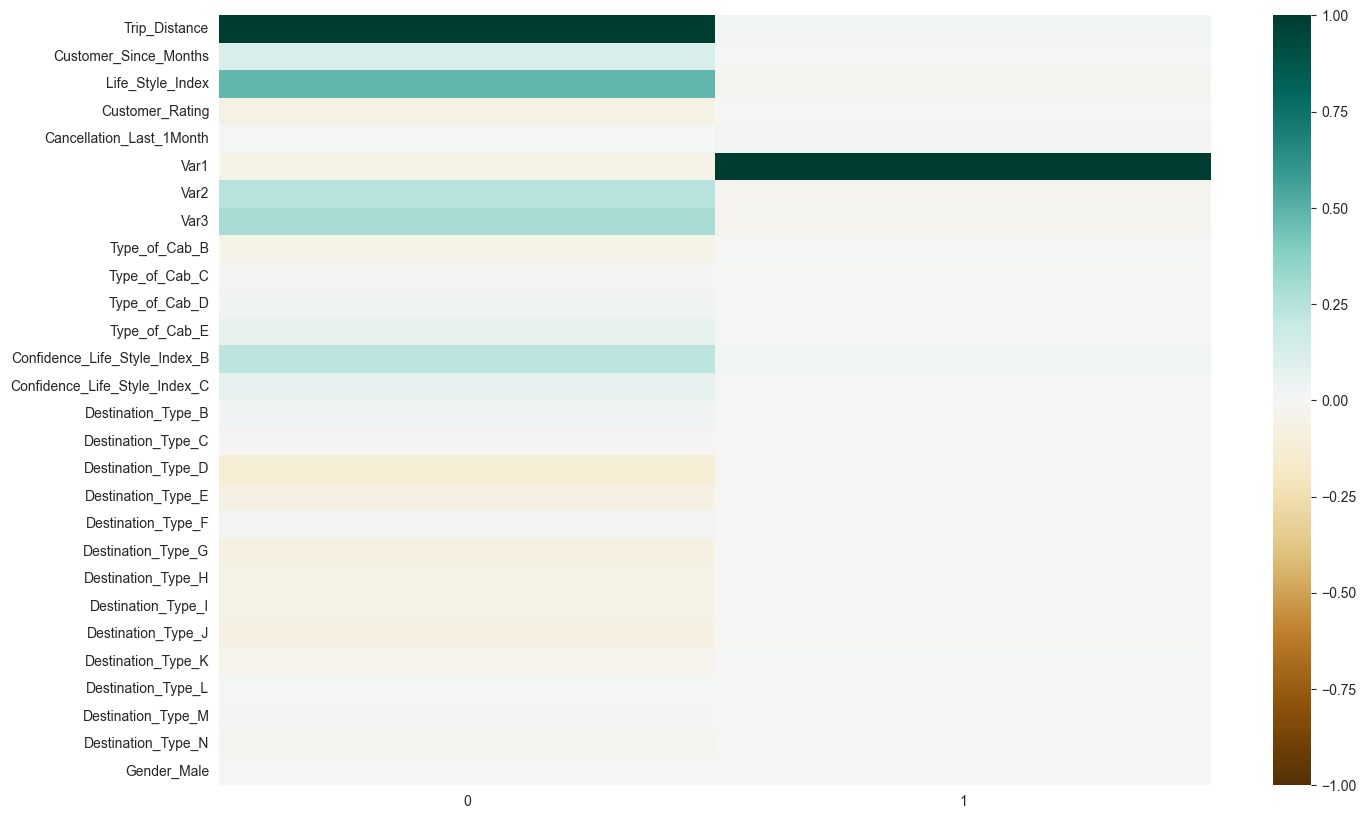

In [10]:
### Your code is here
first_component_corr = X_centered.corrwith(PCA_dataset.PCA1)
second_component_corr = X_centered.corrwith(PCA_dataset.PCA2)
corrs = pd.concat((first_component_corr, second_component_corr), axis=1)

fig = plt.figure()

fig.set_size_inches(16, 10)

sns.heatmap(corrs,
            xticklabels=corrs.columns,
            yticklabels=corrs.index,
            cmap='BrBG',
            vmin=-1,
            vmax=1)

plt.show()

**Задание 3.** Изобразите двумерную проекцию данных с метками классов. Выделите третью главную компоненту и аналогично нарисуйте трехмерную проекцию с метками классов. \
**Какие признаки коррелируют с третьей компонентой?**

In [3]:
### Your code is here




Советуем еще и замерить попарные корреляции между главными компонентами! Это поможет в ответе на один из тестовых вопросов.

In [5]:
### Your code is here





**Задание 4.** Обучите логистическую регрессию на первых двух компонентах центрированных данных и подберите гиперпараметры. Обучите логистическую регрессию на центрированных данных и подберите гиперпараметры. **Сравните метрику accuracy и f1-score на тестовой выборке в двух моделях**.

P.S. для удобства, скорости и нормализации данных (понадобится, так как захотим повалидироваться на параметрах регуляризации) можно построить конструкцию Pipeline c 3 следующими степами: StandardScaler -> PCA -> LogisticRegression

In [29]:
np.random.seed(2022)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_centered, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [31]:
### Your code is here

param_grid = {'model__penalty': ['l1', 'l2', 'elasticnet'],
              'model__C': [1e-5, 0.0001, 0.001, 0.01]}





Кажется, достаточно сильно теряем в качестве! Может, добавить компонент?

**Задание 5.** Обучите модели логистической регресии на нескольких различных компонентах: [2, 4, 8, 16, 28]. **Нарисуйте графики зависимости accuracy, f1-score от количества компонент. Введите их значения через запятую**. При обучении используйте l2-регуляризацию, гиперпараметр C подбирайте по сетке. 


In [35]:
### Чтобы не заставлять вас писать похожий на предыдущий код,
### Написали функцию, которая будет обучать модель для
### произвольного числа n_components главных компонент.

def train_pca_i(n_components, X_train, y_train):
    pipe = Pipeline([('scaler', StandardScaler()), 
                     ('pca', PCA(n_components=n_components)),
                     ('model', LogisticRegression(penalty='l2', solver='saga',random_state=1))])
    
    param_grid = {'model__C': [0.0001, 0.001, 0.01, 0.1]}
    
    grid = GridSearchCV(pipe, param_grid, cv=5)
    grid.fit(X_train, y_train)
    
    report = classification_report(y_test, grid.predict(X_test), output_dict=True)
    return (report['accuracy'], 
            report['weighted avg']['f1-score'])

In [36]:
%%time
accuracy_dict, f1_score_dict = {}, {}
components_list = [2, 4, 8, 16, 28]

for n_components in components_list:
    
    ### Your code is here
    
    

Wall time: 1min 21s


Обычно, когда решается какая-то высокоразмерная предсказательная задача, где тысячи признаков, функция качества PCA моделей похожа на параболу ветвями вниз в зависимости от количества компонент (для совсем маленьких и больших n_component качество маленькое, при этом есть где-то промежуточное значение).

Как думаете, почему здесь у нас непрерывно растущие графики качества?

Может, изначальные признаки были слишком хороши?

### t-SNE

Напомним, что метод заключается в введении некоторых функций, основанных на расстоянии между признаками, которые измеряют близость объектов. Функций, как вы помните, две, и они заданы в исходном и новом пространствах соотвественно. Далее минимизируем дивергенцию Кульбака-Лейблера по координатaм в новом пространстве

**Задание 6.** Обучите t-sne c `n_components=2` на изначальных данных и визуализируйте результаты с учетом известных классов. 

P.S. если устанете ждать обучения TSNE, или упадет ошибка по типу oom, то можно сократить число объектов в датасете до, например, пары тысяч. Это и следующее задания никак проверяться системой не будут. Вам достаточно повторить упражнение с практики и получить какое-то более адекватное (по сравнению с PCA) изображение классов.

In [6]:
from sklearn.manifold import TSNE

### Your code is here



**Задание 7.** Обучите t-sne с `n_components=3` на изначальных данных и визуализируйте результаты с учетом известных классов.

In [7]:
### Your code is here



Советуем обрезать датасет до маленького числа объектов (чтобы точки и их группки были хорошо различимы) и поиграться с гиперпараметрами класса Tsne! Обычно такая "игра" может привести к куда более красивым результатам по сравнению с теми, что получены с дефолтными настройками!